In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [18]:
sample_data = [
    ("Apple", 10, 0.5),
    ("Banana", 5, 0.3),
    ("Apple", 20, 0.5),
    ("Orange", 8, 0.7),
    ("Banana", 12, 0.3),
    ("Orange", 15, 0.7),
]

In [20]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [22]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

In [24]:
print(" Sales Summary:\n")
print(df)

 Sales Summary:

  product  total_quantity  revenue
0   Apple              30     15.0
1  Banana              17      5.1
2  Orange              23     16.1


<Figure size 800x500 with 0 Axes>

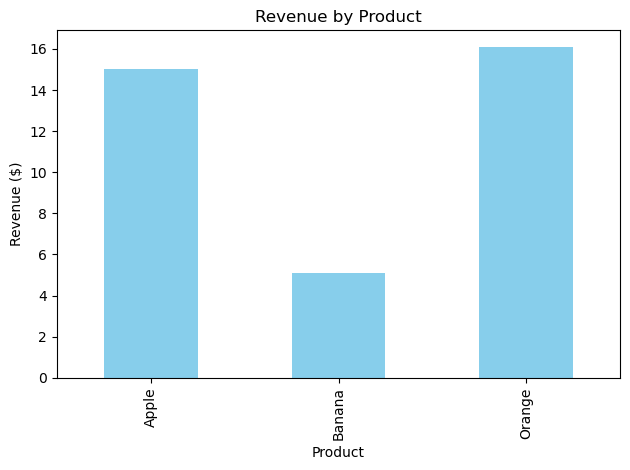

In [26]:
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()